In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv')

In [3]:
df.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [4]:
df.info()
df['cyberbullying_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

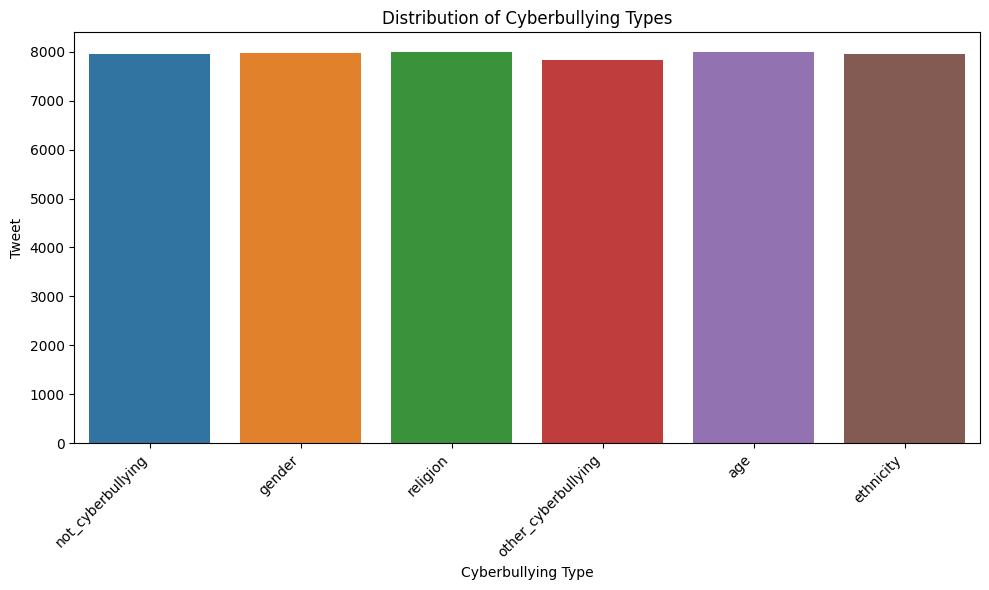

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cyberbullying_type')
plt.title('Distribution of Cyberbullying Types')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Tweet')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
import re

def preprocess(text):
  text = text.lower()
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'[^a-z\s]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text

In [11]:
df['cleaned_text'] = df['tweet_text'].apply(preprocess)

In [8]:
df['tweet_text'].head()

0    In other words #katandandre, your food was cra...
1    Why is #aussietv so white? #MKR #theblock #ImA...
2    @XochitlSuckkks a classy whore? Or more red ve...
3    @Jason_Gio meh. :P  thanks for the heads up, b...
4    @RudhoeEnglish This is an ISIS account pretend...
Name: tweet_text, dtype: object

In [12]:
df['cleaned_text'].head()

0    in other words katandandre your food was crapi...
1    why is aussietv so white mkr theblock imaceleb...
2           a classy whore or more red velvet cupcakes
3    meh p thanks for the heads up but not too conc...
4    this is an isis account pretending to be a kur...
Name: cleaned_text, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [14]:
X = df['cleaned_text']
y = df['cyberbullying_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
len(X_train)

38153

In [16]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

In [17]:
target_names = sorted(df['cyberbullying_type'].unique())
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

                age       0.97      0.98      0.97      1598
          ethnicity       0.98      0.96      0.97      1592
             gender       0.89      0.82      0.85      1595
  not_cyberbullying       0.58      0.50      0.53      1589
other_cyberbullying       0.57      0.70      0.63      1565
           religion       0.94      0.94      0.94      1600

           accuracy                           0.82      9539
          macro avg       0.82      0.82      0.82      9539
       weighted avg       0.82      0.82      0.82      9539



In [19]:
import torch
df = pd.read_csv('/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [20]:
labels = df['cyberbullying_type'].unique().tolist()
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for label, i in label2id.items()}

df['labels'] = df['cyberbullying_type'].map(label2id)

In [21]:
df['labels'].head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [22]:
def bertweet_preprocess(text):
  text = re.sub(r'@\w+', '@USER', text)
  text = re.sub(r'https?://\S+', 'HTTPURL', text)
  return text

df['bert_text'] = df['tweet_text'].apply(bertweet_preprocess)

In [23]:
df['bert_text'].head()

0    In other words #katandandre, your food was cra...
1    Why is #aussietv so white? #MKR #theblock #ImA...
2    @USER a classy whore? Or more red velvet cupca...
3    @USER meh. :P  thanks for the heads up, but no...
4    @USER This is an ISIS account pretending to be...
Name: bert_text, dtype: object

In [24]:
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['labels'])

len(train_df), len(eval_df)

(38153, 9539)

In [25]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('vinai/bertweet-base', use_fast = True)

train_encodings = tokenizer(train_df['bert_text'].tolist(), truncation=True, padding=True, max_length=128)
eval_encodings = tokenizer(eval_df['bert_text'].tolist(), truncation=True, padding=True, max_length=128)

config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [26]:
class CyberbullyingDataset(torch.utils.data.Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

In [29]:
train_dataset = CyberbullyingDataset(train_encodings, train_df['labels'].tolist())
eval_dataset = CyberbullyingDataset(eval_encodings, eval_df['labels'].tolist())

In [27]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained('vinai/bertweet-base', num_labels=len(labels), id2label=id2label, label2id=label2id)

training_args = TrainingArguments(
    output_dir='./results_bertweet',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs_bertweet',
    logging_steps=100,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none"
)

2025-07-05 09:15:52.315578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751706952.507648      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751706952.563747      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

In [30]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)
trainer.train()

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.385900,0.331446
2,0.299500,0.333703
3,0.201600,0.330677


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


TrainOutput(global_step=3579, training_loss=0.3582759115342223, metrics={'train_runtime': 1766.8253, 'train_samples_per_second': 64.782, 'train_steps_per_second': 2.026, 'total_flos': 7529127465641472.0, 'train_loss': 0.3582759115342223, 'epoch': 3.0})

In [31]:
eval_results = trainer.evaluate()
print(eval_results)

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


{'eval_loss': 0.3306769132614136, 'eval_runtime': 34.2469, 'eval_samples_per_second': 278.536, 'eval_steps_per_second': 2.19, 'epoch': 3.0}


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = trainer.predict(eval_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = eval_dataset.labels

target_names = [id2label[i] for i in sorted(id2label.keys())]
print(classification_report(y_true, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

  not_cyberbullying       0.72      0.64      0.68      1589
             gender       0.91      0.89      0.90      1595
           religion       0.97      0.96      0.97      1600
other_cyberbullying       0.69      0.80      0.74      1565
                age       0.99      0.98      0.98      1598
          ethnicity       0.99      0.98      0.99      1592

           accuracy                           0.88      9539
          macro avg       0.88      0.88      0.88      9539
       weighted avg       0.88      0.88      0.88      9539



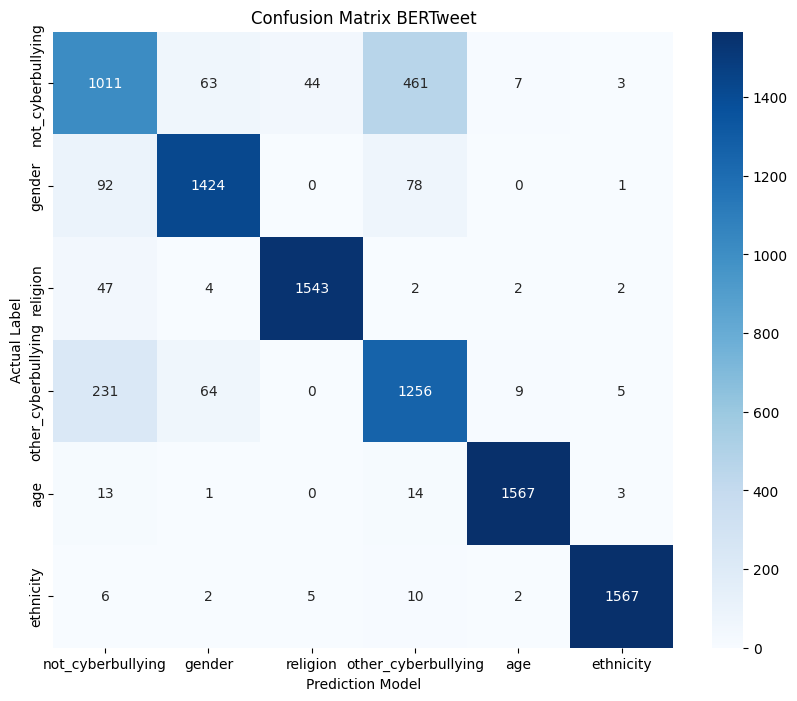

In [33]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Prediction Model')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix BERTweet')
plt.show()

In [34]:
from transformers import pipeline

interactive_pipe = pipeline(
    "text-classification",
    model=trainer.model,
    tokenizer=tokenizer,
)

Device set to use cuda:0


In [38]:
while True:
    text_input = input("Input Text: (type 'exit' to finish session)  ")

    if text_input.lower() in ["exit"]:
        print("Session Finish.")
        break

    result = interactive_pipe(text_input)
    prediction = result[0]

    print(f"prediction: {prediction['label']} (Score: {prediction['score']:.4f})\n")

Input Text: (type 'exit' to finish session)   What's the point of wearing a hijab if you still act like that? You're just an embarrassment to your religion.


prediction: religion (Score: 0.9975)



Input Text: (type 'exit' to finish session)   Of course he's lazy, what else do you expect from people of his race?


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


prediction: ethnicity (Score: 0.6269)



Input Text: (type 'exit' to finish session)   Does anyone have good book recommendations on history?


prediction: not_cyberbullying (Score: 0.9816)



Input Text: (type 'exit' to finish session)   Everyone knows you're just a pathetic attention seeker. You have zero talent and just rely on drama to stay relevant.


prediction: other_cyberbullying (Score: 0.7410)



Input Text: (type 'exit' to finish session)   exit


Session Finish.


In [39]:
import os

save_directory = "/kaggle/working/cyberbullying_bertweet_model"

os.makedirs(save_directory, exist_ok=True)

trainer.save_model(save_directory)
tokenizer.save_pretrained(save_directory)

('/kaggle/working/cyberbullying_bertweet_model/tokenizer_config.json',
 '/kaggle/working/cyberbullying_bertweet_model/special_tokens_map.json',
 '/kaggle/working/cyberbullying_bertweet_model/vocab.txt',
 '/kaggle/working/cyberbullying_bertweet_model/bpe.codes',
 '/kaggle/working/cyberbullying_bertweet_model/added_tokens.json')